What matters and what does not when programmers do job searching


1. What does candidate looking for technical positions mostly look for in future companies
2. If programmers were recruiters, what do they look for in potential candidates
3. What is deemed as not important to recruiters so candidates can have less focus on when applying 


In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import os

for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


archive/survey_results_public.csv
archive/survey_results_schema.csv


In [8]:
#Read the data and glimpse through it
df = pd.read_csv('archive/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Read schema file in order to locate questions of interest
df_cols = pd.read_csv('archive/survey_results_schema.csv')
#Browse through questions in the schema file
full_answers=list(df_cols.iloc[:,1])


In [10]:
full_answers

['Respondent ID number',
 'Which of the following best describes you?',
 'Do you program as a hobby or contribute to open source projects?',
 'In which country do you currently live?',
 'Are you currently enrolled in a formal, degree-granting college or university program?',
 'Which of the following best describes your current employment status?',
 "Which of the following best describes the highest level of formal education that you've completed?",
 "Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?",
 'How often do you work from home or remotely?',
 'In terms of the number of employees, how large is the company or organization you work for?',
 'Which of the following best describes the type of company or organization you work for?',
 'How long has it been since you first learned how to program?',
 'For how many years have you coded as part of your job?',
 'For how many years did you code as part of you

After browing the question list, question of interest is: 

1. 'When you're assessing potential jobs to apply to, how important are each of the following to you?'
2. 'How important should each of the following be in Globex's hiring process?'


In [11]:
#To understand the question and answer structure, below function will pull all possible answers in questions of interest
#In the schema file, answers to question 1 have row index from 69 to 79 and answers to question 2 have row index from 49 to 63 
cols_candidates=df_cols.iloc[49:64,0]
cols_recruits=df_cols.iloc[69:79,0]

In [18]:
def Browse_answer_format(df,cols):

    '''
    
    Displays all unique answers to the questions, goal is to confirm these answers follow the same format
    
    Parameters:
    df: dataframe 
    cols: cols_candidates or cols_recruits
    
    '''
    value_list=list(df[cols].iloc[:,0].unique())
    for col in list(cols):

        values=df[cols][col].unique()
        for val in values:
            if val not in value_list:
                value_list+=val
    return value_list

In [19]:
Browse_answer_format(df,cols_candidates)

['Very important',
 nan,
 'Somewhat important',
 'Important',
 'Not very important',
 'Not at all important']

In [20]:
Browse_answer_format(df,cols_recruits)

['Important',
 nan,
 'Somewhat important',
 'Not very important',
 'Very important',
 'Not at all important']

Both of these two questions provide a list of sub-questions and ask the respondents to give an importance level rating. 


In [21]:
#So all of these qiuestions have answers that  by importance level and contains nan values.
#Drop any rows with missing values to get distribution of all valid answers to these questions. 

to_apply=df[cols_candidates].dropna()
to_recruit=df[cols_recruits].dropna()

 
print('For answers to questions: factors important in potential jobs to apply to, there were {} options and total of {} valid respondents'.format(to_apply.shape[1],to_apply.shape[0]))
print('For answers to questions: factors important in potential candidates to recruit, there were {} options and total of {} valid respondents'.format(to_recruit.shape[1],to_recruit.shape[0]))

For answers to questions: factors important in potential jobs to apply to, there were 15 options and total of 20661 valid respondents
For answers to questions: factors important in potential candidates to recruit, there were 10 options and total of 27170 valid respondents


In [22]:
#Because the columns in survey dataset are not in plain language, here is a function to map the columns to readable options in the schema file 
#This function can be used for any columns that were follow-up options to one question in the survey 

answer_option={} #Create dictionary with keys as original column name and values as detailed survey question

def map_answer_to_columns(start,end,df):
    '''
    map the columns to readable answer in the schema file 
    
    Parameters:
    start: start of row index of answers in schema file
    end: end of row index of answers in schema file
    df: dataframe of all responses
    
    '''    
    
    for i in range(start,end+1):
        mystring =  str(df_cols.iloc[i]['Question'])   
        before_keyword, keyword, after_keyword = mystring.partition( '? ')
        answer_option[df_cols.iloc[i]['Column']]=after_keyword
    df.rename(answer_option,axis=1,inplace=True)
    return df


In [23]:
to_recruit=map_answer_to_columns(69,79,to_recruit)

In [24]:
to_apply=map_answer_to_columns(49,63,to_apply)

In [48]:
[i.replace(","," ") for i in to_recruit.columns]

['Knowledge of algorithms and data structures',
 'Experience with specific tools (libraries  frameworks  etc.) used by the employer',
 'Communication skills',
 'Contributions to open source projects',
 'Experience with specific project management tools & techniques',
 'Previous companies worked at',
 'Previous job titles held',
 'Educational credentials (e.g. schools attended  specific field of study  grades earned)',
 'Stack Overflow reputation',
 'Track record of getting things done']

In [16]:

# Data Understanding
def bar_chart_answers(df,importance_level):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    col: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    '''
    
    status_vals=[]
    #count of 'very important' across all columsn 
    for i in range(len(df.columns)):
        status_vals.append(df.iloc[:,i].value_counts(normalize=True)[importance_level])
    df_temp=pd.DataFrame(data=status_vals,index=df.columns.values,columns=[importance_level])
    df_temp=df_temp.sort_values(by=importance_level,ascending=False)
    df_temp.plot(kind='bar')
    
    if df.columns[0]=="The industry that I'd be working in":
        plt.title('Factors rated as {} to appliants when applying for jobs'.format(str(importance_level).lower()))
    else:
        plt.title('Factors rated as {} to recruiters when looking for candidates'.format(str(importance_level).lower()))    
    return df_temp

,Very important
Opportunities for professional development,0.425730
The compensation and benefits offered,0.352984
"The languages, frameworks, and other technologies I'd be working with",0.338173
The amount of time I'd have to spend commuting,0.319733
The office environment I'd be working in,0.311747
How projects are managed at the company or organization,0.246987
The opportunity to work from home/remotely,0.217947
The specific role or job title I'd be applying for,0.195150
The specific department or team I'd be working on,0.183292
The industry that I'd be working in,0.156672


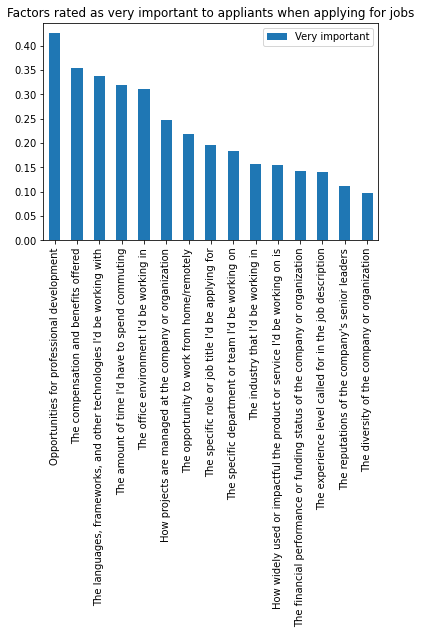

In [17]:
bar_chart_answers(to_apply,'Very important')

Reading the top 5 factors applicants care about when applying, over 40% of respondents rate 'Opportunities for professional development' as 'Very Important' and thsi shows when applicants consider applying jobs, they are extremely future-oriented and look for potentials in a company. 

32% respondents rated 'The amount of time I'd have to spend commuting' and 31% rated 'The office environment I'd be working in' as very important. This highlights the trade-offs between the attractiveness of office environment and how much commute it takes to get there. These were factors not relevant to the nature of work but definitely shows the fact 'we are all human' and is percetiple of all the things come with 'going to work'. 


,Very important
Track record of getting things done,0.348767
Communication skills,0.342878
Knowledge of algorithms and data structures,0.223850
"Experience with specific tools (libraries, frameworks, etc.) used by the employer",0.157159
Experience with specific project management tools & techniques,0.059036
Contributions to open source projects,0.051969
"Educational credentials (e.g. schools attended, specific field of study, grades earned)",0.035259
Previous companies worked at,0.031910
Previous job titles held,0.028892
Stack Overflow reputation,0.021273


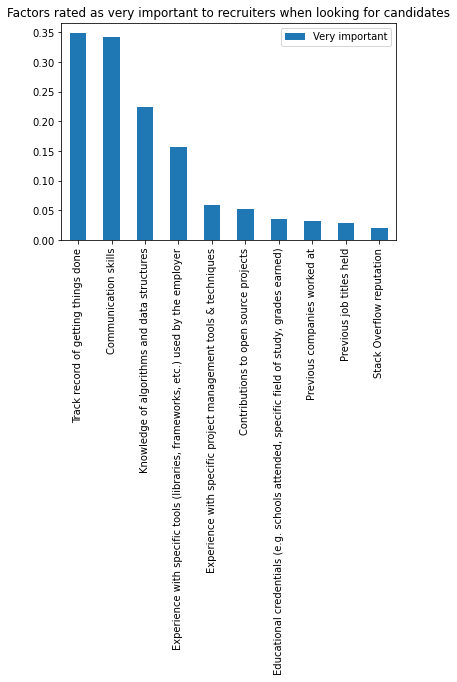

In [18]:
bar_chart_answers(to_recruit,'Very important')

Reading the top factors rated as 'Very important' if an engineer is put as recruiter, 'Track record of getting things done' and 'Communication skills' were the most important. These two factors highlight the actual ability to thrive in a collaborative environment and carry it through to accomplish tasks or projects. 
 
Factors that are traditionally sought after and are listed on our resume, such as educational credentials, previous job titles and companies, were actually not as important. 


,Not very important
The diversity of the company or organization,0.218479
The opportunity to work from home/remotely,0.180727
The reputations of the company's senior leaders,0.173999
The industry that I'd be working in,0.168675
How widely used or impactful the product or service I'd be working on is,0.137215
The specific role or job title I'd be applying for,0.134166
The specific department or team I'd be working on,0.121582
The financial performance or funding status of the company or organization,0.107400
The experience level called for in the job description,0.092590
How projects are managed at the company or organization,0.061517


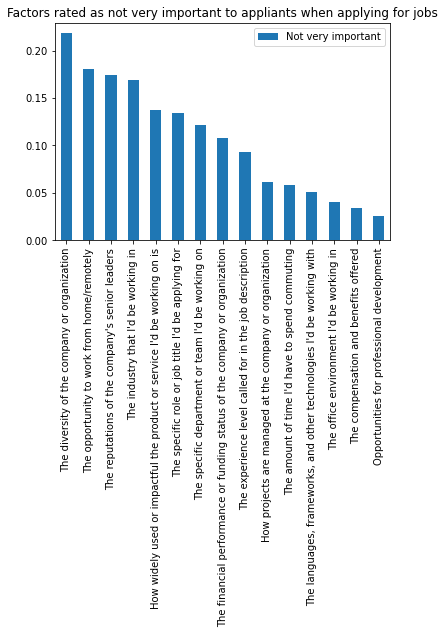

In [19]:
bar_chart_answers(to_apply,'Not very important')

,Not at all important
The diversity of the company or organization,0.116016
The reputations of the company's senior leaders,0.047965
The opportunity to work from home/remotely,0.047868
The industry that I'd be working in,0.039301
The specific role or job title I'd be applying for,0.039059
How widely used or impactful the product or service I'd be working on is,0.032428
The specific department or team I'd be working on,0.025894
The experience level called for in the job description,0.022845
The financial performance or funding status of the company or organization,0.021296
The amount of time I'd have to spend commuting,0.012003


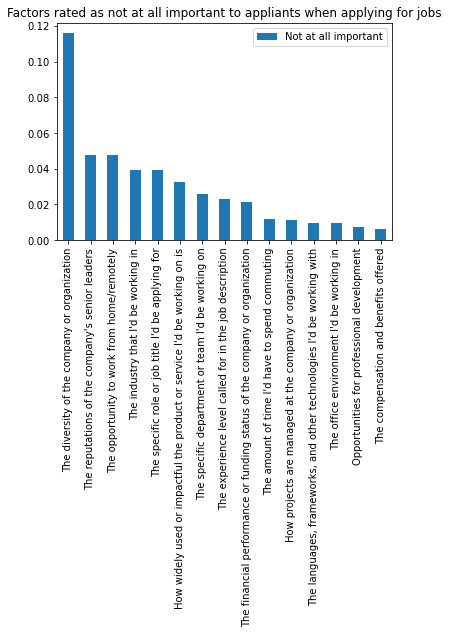

In [20]:
bar_chart_answers(to_apply,'Not at all important')

To my surprise, 'The diversity of the company or organization' was the top factors rated as 'Not Important', which is not aligned with current social movement. One fact to take into consideration is, generally speaking, engineers are a very diverse group already. Is it one of the job categories that contain heighst concernstation of international students and workers. However, this also insinuates social movement doesn't necessarily modify our expecations about workplace.  

This survey was a little outdated and with pandemic a lot of people prefer flexibilities with their 'The opportunity to work from home/remotely', it would be interesting to see updated results, to similar group of respondents, their opinion towards remote work opportunities. 



,Not very important
Stack Overflow reputation,0.379757
Contributions to open source projects,0.305594
Previous job titles held,0.298601
Previous companies worked at,0.292344
"Educational credentials (e.g. schools attended, specific field of study, grades earned)",0.289731
Experience with specific project management tools & techniques,0.283585
"Experience with specific tools (libraries, frameworks, etc.) used by the employer",0.124034
Knowledge of algorithms and data structures,0.073316
Track record of getting things done,0.032131
Communication skills,0.028377


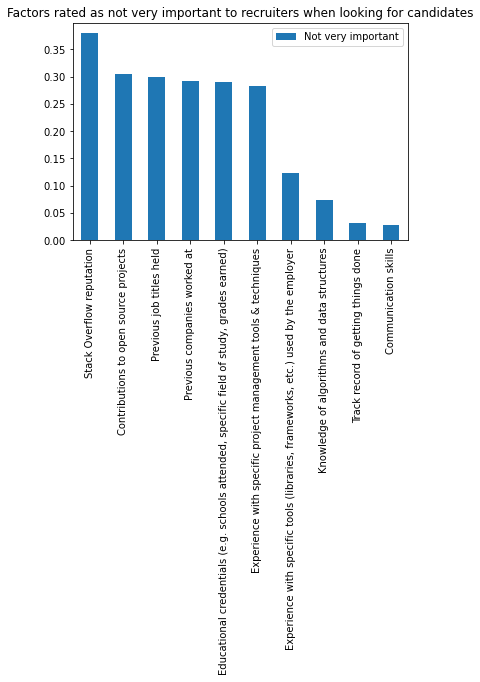

In [21]:
bar_chart_answers(to_recruit,'Not very important')

,Not at all important
Stack Overflow reputation,0.246154
Previous job titles held,0.109753
"Educational credentials (e.g. schools attended, specific field of study, grades earned)",0.100552
Contributions to open source projects,0.089768
Experience with specific project management tools & techniques,0.084910
Previous companies worked at,0.069231
"Experience with specific tools (libraries, frameworks, etc.) used by the employer",0.017851
Knowledge of algorithms and data structures,0.011667
Track record of getting things done,0.007913
Communication skills,0.004674


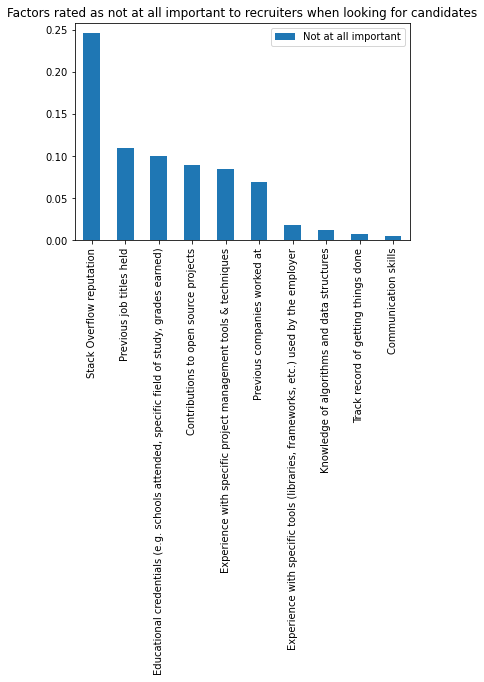

In [22]:
bar_chart_answers(to_recruit,'Not at all important')

As for factors rated not as important or not at all important to recruitment, 'Stack Overflow reputation', 'previous job titles held', 'Educational crendnetials', and 'Contributions to open source projects'. 

These all highlights that programming is a such a job that focuses on 'hands-on project experience', instead of online prescense or shiny history on your resume. What carries beyond your resume is your knowledge in solving real problems. 

To summarize,  'Opportunities for professional development',  'The amount of time I'd have to spend commuting' and 31% rated 'The office environment I'd be working in'
32% respondents rated as very important. This highlights the trade-offs between the attractiveness of office environment and how much commute it takes to get there. These were factors not relevant to the nature of work but definitely shows the fact 'we are all human' and is percetiple of all the things come with 'going to work'.